# Outline

- Data Science methodology and workflow
- Thinking about projects
- Descriptive statistics
- Privacy
- Outliers

## Reading XML Data

XML is a widely used file format for data on the web (well, it has been in the past).   
It is actually a document markup language like HTML, so it can represent quite complex structures. 
However it is often used to store simple tabular data as well.

Here's a [sample XML file](files/sample.xml).

We can use the Python [xml ElementTree module](https://docs.python.org/3.6/library/xml.etree.elementtree.html)
to parse XML data into a Python data structure.  In the case of this 
sample file, it consists of many &lt;record> elements each with four data points. We want to parse into 
a dataframe with four columns. 


In [71]:
import pandas as pd
import xml.etree.ElementTree as ET
tree = ET.parse('files/sample.xml')
root = tree.getroot()
data = []
for row in root:
    # create a dictionary for each row
    datarow = {}
    for child in row:
        # dictionary key is the tag name, value is the text in the tag
        datarow[child.tag] = child.text
    data.append(datarow)
    
# now make a dataframe from this list of dictionaries
df = pd.DataFrame(data)
df.head()

,Amount,City,Date,Name
0,105.06,Sijsele,2018-04-14T08:51:54-07:00,Hedy
1,103.76,Panquehue,2018-07-07T06:54:04-07:00,Indigo
2,110.29,Dijon,2017-04-27T10:06:16-07:00,Jolene
3,94.8,Neuss,2017-11-11T07:26:54-08:00,Bradley
4,96.83,Helena,2017-05-09T05:26:05-07:00,Clementine


So there's the data read into a dataframe.  We might note that the Date field looks like a date so should
be treated as such rather than a string. 

In [73]:
df = pd.DataFrame(data)
# sort on date
df = df.sort_values('Date')
# create a series from the dates as datetimes
dates = pd.to_datetime(df.Date)
# make this the index of the dataframe
df.index = dates
# remove the Date column (axis=1 means we're dropping a column, not rows)
df.drop('Date', axis=1, inplace=True)
df.head()

,Amount,City,Name
Date,,,
2016-08-24 08:35:12,97.98,Neumünster,Tanya
2016-08-27 03:56:02,99.04,Rovereto,Molly
2016-09-06 08:58:15,99.27,Rovereto,Aiko
2016-09-10 21:10:12,96.53,Westkerke,Dante
2016-09-12 22:32:09,107.23,Pointe-aux-Trembles,Sydney


In [77]:
# having a datetime index means we can easily select rows for a given year etc
df['2016']

,Amount,City,Name
Date,,,
2016-08-24 08:35:12,97.98,Neumünster,Tanya
2016-08-27 03:56:02,99.04,Rovereto,Molly
2016-09-06 08:58:15,99.27,Rovereto,Aiko
2016-09-10 21:10:12,96.53,Westkerke,Dante
2016-09-12 22:32:09,107.23,Pointe-aux-Trembles,Sydney
2016-09-13 10:51:59,99.06,Bromley,Yasir
2016-09-17 13:10:04,100.44,Illapel,Grady
2016-09-17 19:05:52,90.59,Regensburg,Bernard
2016-09-20 03:31:41,103.11,Zaanstad,Jakeem


## Methodology

<a title="By Kenneth Jensen [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACRISP-DM_Process_Diagram.png"><img width="512" alt="CRISP-DM Process Diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/512px-CRISP-DM_Process_Diagram.png"/></a>

This diagram illustrates the CRISP-DM process diagram.  CRISP-DM is a standardised workflow 
for Data Mining/Data Science that attempts to lay out a methodology to follow in a project.
Compare with what you've seen about the software development lifecycle. 

[This post by Locke Data](https://itsalocke.com/crisp-dm/) gives a concise overview of the methodology. Note also the link included in that post to the Microsoft Team Data Science Process, that site provides quite a bit more detail.

The methodology highlights the fact that there are many phases to a DS project apart from what we might understand as the 'real data science' part of data preparation and modelling.  Those core parts are the main skills we're learning about in this unit, but we need to see where they fit into the bigger picture.  In many ways they might not be the hardest part of a project. 

- **Business Understanding** DS problems generally come out of some business need (or maybe from some scientific or humanities research goal).  So, understanding why the questions are being asked and how an answer might be used is important.
- **Data Understanding** what data is available, what do the fields mean, what other data sources would we like to be able to access, assessing data quality
- **Data Preparation** and **Modelling** are the core processes we're learning how to do in Python
- **Model Evaluation** how will you know if you've succeeded? Evaluation of the model with respect to business needs - are the predictions accurate enough to help the business?
- **Deployment** is this a one off analysis that generates a report or a model that will be used repeatedly in some kind of production environment? Does it need to be updated as new data becomes available?



## Sample DS Projects

[A Gallery of Interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#social-data) contains some interesting examples including
- [Using Python to see how the Times writes about men and women](http://nbviewer.ipython.org/gist/5105037)
- [An exploratory statistical analysis of the 2014 World Cup Final](http://nbviewer.jupyter.org/github/rjtavares/football-crunching/blob/master/notebooks/an%20exploratory%20data%20analysis%20of%20the%20world%20cup%20final.ipynb)
- [St. Louis County Segregation Analysis](https://github.com/BuzzFeedNews/2014-08-st-louis-county-segregation) a notebook accompanying a Buzzfeed article

[FiveThirtyEight](https://fivethirtyeight.com/) is a data backed news site and they publish datasets behind each of their stories [on github](https://github.com/fivethirtyeight/data). These provide some nice examples that you could try to reproduce or extend


### Activity

Brainstorming projects: in small groups (4-5) come up with some ideas for projects that you might
do for your major project in COMP257 this semester.  The idea of this exercise is just to get
very high level ideas so that we can talk about how reasonable/feasible they are. 

Your suggested project should involve:
 - more than one dataset that you've found from a 'real world' source
 - presenting a statistical analysis
 - using a predictive model in some way
 - a clear hypothesis or question that you're trying to answer with your analysis
 

## Descriptive Statistics

One of the first things we can do with a new data set is to explore it and see what the main characteristics are. To do this we can look at e.g.:

- size and shape of the data
- range of values in columns
- are there missing values
- how are values distributed: mean, median, variance

What does it mean if we find that the variance of our sample is very high on one variable? 

Does the mean and variance tell the whole story? 

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
ds1 = pd.read_csv("files/ds1.csv")
ds2 = pd.read_csv("files/ds2.csv")
ds3 = pd.read_csv("files/ds3.csv")

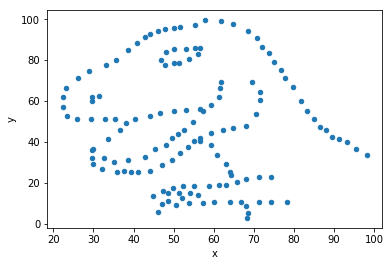

In [119]:
# look at summary stats for ds[123]
ds1.plot('x', 'y', kind='scatter')

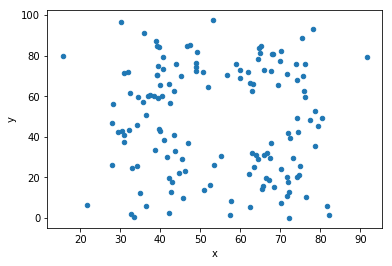

In [120]:
ds2.plot('x', 'y', kind='scatter')

That data comes from [the Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats) and is designed to illustrate the point that your initial exploration of the data should include some visulalisation since summary statistics don't give the full story.

## A Sample Dataset - Grades

Let's look at a sample dataset from a University course containing the students ATAR and their final grade and mark for the course.  

Firstly, let's consider what kind of business questions we might be able to answer with this kind of data.  Imagine you were working in the University Analyitics group and had access to all of the data about student results and past performance, and all of the degree structure information.  What kind of questions might you be able to answer with this data that might help the University in some way? 

Now let's explore the data a little.

In [124]:
# read some data for grades vs ATAR 
grades = pd.read_csv("files/grades.csv")
grades.head()

,ATAR,Grade,Mark
0,52.40,F,33.0
1,67.45,D,82.0
2,63.45,W,0.0
3,64.35,W,0.0
4,66.30,W,0.0


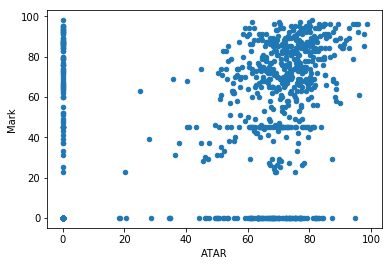

In [125]:
# let's explore
grades.plot('ATAR', 'Mark', kind='scatter')

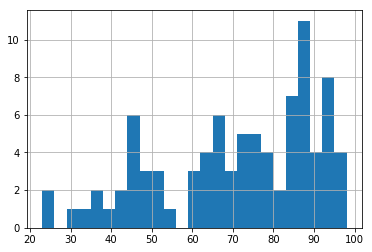

In [103]:
# let's remove any with no ATAR and zero marks
grades = grades.drop(grades.index[(grades.Mark == 0) & (grades.ATAR == 0)])

# now look at those students with no ATAR
noatar = grades[(grades.ATAR == 0)]
# plot their distribution
noatar.Mark.hist(bins=25)

In [108]:
# looks like many of them did very well, we could check their grades
noatar.groupby('Grade').count()

,ATAR,Mark
Grade,,
CR,16,16
D,14,14
F,18,18
HD,29,29
IS,3,0
P,11,11


In [114]:
# split into pass and fail students
pass_students = grades[(grades.Mark >= 50)]
fail_students = grades[(grades.Mark < 50)]
# and check the mean ATAR
pass_students.ATAR.mean(), fail_students.ATAR.mean()

(62.161146496815292, 60.225213675213674)

In [129]:
# they aren't too different, what about the standard deviation
pass_students.ATAR.std(), fail_students.ATAR.std()
# again very similar

(27.661438478191048, 21.533421098447732)

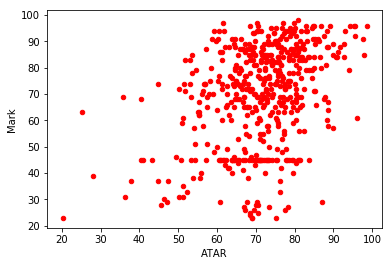

In [139]:
# now let's remove all zeros and see the distribution
nonzero = grades.drop(grades.index[(grades.Mark == 0) | (grades.ATAR == 0)])
nonzero.plot(x='ATAR', y='Mark', color='red', kind='scatter')

## Privacy 

I just gave you some potentially private data about students, their ATAR and their grades.  It doesn't include
any identifying information but if I told you which unit it was from which year that might allow you to make
some inferences.   

Say it was the year you did this unit and you knew that your friend got five more marks than you. This 
would potentially allow you to find their ATAR. I've now leaked a bit of personal information about 
someone else to you. (In my defense, in this data there are only 4 cases where 
only one student got a given mark, so the probability of revealing ATAR for an individual is low). 

This is a relatively benign example - knowing someone's ATAR is not really that useful although it might 
be a bit embarrasing in some cases.   However it could be a piece in a larger puzzle that is gathered from 
this and other datasets.  Each one might not reveal much or anything, but linked to another dataset 
with common information might reveal much more. 

The [Australian Privacy Principles](https://www.oaic.gov.au/privacy-law/privacy-act/australian-privacy-principles) 
outline the responsibilities of organisations who hold private information on people and how it can be 
collected, used and released.   Note [this comment](https://theconversation.com/australias-privacy-laws-gutted-in-court-ruling-on-what-is-personal-information-71486) 
on a Federal Court case that ruled that only data that directly identifies an individual is 'private data' 
under the act in contrast with the regimes in other countries.




## Outliers

Many datasets will contain errors of some kind that will show in the data as outliers.  These will alter
the distribution of the data and get in the way of being able to accurately model the data. So, it is 
in our interests to remove these outliers. 

### Identifying Outliers

To identify outliers we need to know what normal is - so the descriptive statistics described earlier 
play a part in determining what is unusual.  

A common assumption (or model) is a **normal distribution** for the data. Normally distributed data will be 
evenly distributed around the mean with fewer points the further away from the mean you go.  If this is
the case we could define an outlier as a point that falls some number of standard deviations away from
the mean.  There are some [tests for outliers](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm)
based on this idea. 

Another way to look for outliers is based on our understanding of the data. In the Adult data used in
the text (and the practical) they exclude high income earners below 22 and above 72 because such people
are not very likely to be able to earn that much.  **How valid is this?**

### Why are they there?

While outliers might get in the way of good modelling, they are there for a reason. That could be just a human
or instrument error when collecting the data or it could be some higher order effect that is 
informative in itself. 

Outliers in the grades data:
- People without an ATAR
- Poeple who withdrew from the unit

### Filtering data

Look at some examples of filtering data to identify and remove outliers.

Boolean series created from comparisons of a variable in a data frame.

In [140]:
# Find marks that are zero and remove them 
zeros = (grades.Mark == 0) 
grades_no_zeros = grades.drop(grades.index[zeros])
grades_no_zeros.describe()
## see more worked examples above

,ATAR,Mark
count,527.000000,510.000000
mean,71.265465,69.707843
std,11.087434,18.961416
min,20.200000,23.000000
25%,65.600000,57.250000
50%,72.200000,74.000000
75%,78.425000,85.000000
max,98.650000,98.000000
